# Visualization Basics

In [1]:
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib


import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes


## mtcars dataset

 

The documentation for this data is [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) but I have extracted some relevant parts below:

```
Description

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Usage

mtcars
Format

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	V/S
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors
Source

Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
```

In [2]:
dfcars=pd.read_csv("https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/VizData/mtcars-edited.csv")
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


We can construct the `av_mpg` series by using the "split-apply-combine" paradigm and summarizing within group data by a mean:

In [3]:
av_mpg = dfcars.groupby('maker').mpg.mean()
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

In [4]:
import seaborn as sns

Now we see maplotlib's default color palette, 'viridis'.

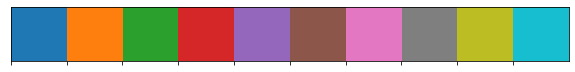

In [5]:
sns.palplot(sns.color_palette());

#### Bar Charts

We see that Pandas series very niftily give us bar graphs. Pandas has many other charts. They will use the standard palette.

<AxesSubplot:ylabel='maker'>

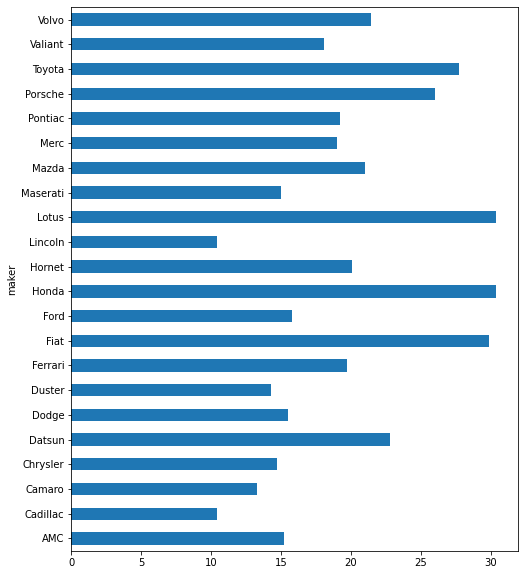

In [6]:
plt.figure(figsize=(8, 10))
av_mpg.plot(kind="barh")

## Co-relations and diverging Palettes

In [7]:
dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr()

,mpg,wt,hp,qsec,disp
mpg,1.000000,-0.867659,-0.776168,0.418684,-0.847551
wt,-0.867659,1.000000,0.658748,-0.174716,0.887980
hp,-0.776168,0.658748,1.000000,-0.708223,0.790949
qsec,0.418684,-0.174716,-0.708223,1.000000,-0.433698
disp,-0.847551,0.887980,0.790949,-0.433698,1.000000


Since correlations range from -1 to 1 through 0, a diverging palette is probably our best bet.

In [8]:
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

We use `maptplotlib`s correlation plot. You'll land up doing plots like this for both EDA and do see misclassification from your machine learning algorithms. In other words, EDA is even useful at the analysis stage.

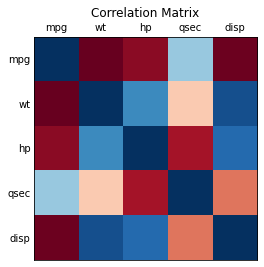

In [9]:
plt.matshow(dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);
plt.title("Correlation Matrix")
plt.xticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp'])
plt.yticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp']);


### Density Plots and Sequential Palettes.

Here we make a KDE plot of a multivariate normal distribution. Since a probability density is strictly positive, with values near 0 not being so interesting, a sequential palette is our ticket. Seaborn will by default provide such a palette for KDE plots, but you can use your own!

In [10]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,0.702234,0.181576
1,-1.917414,1.574824
2,-0.205368,1.596475
3,0.016095,-0.343009
4,0.085280,2.168099


In [12]:
seqpal = sns.choose_colorbrewer_palette("sequential", as_cmap=True)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

/home/chaitanya/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


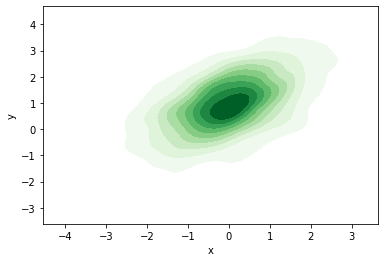

In [13]:
sns.kdeplot(df.x, df.y, cmap=seqpal, shade=True);

## EDA Visualization

## PRE-EDA RUBRIC: What is our input?

(1) **Build** a DataFrame from the data (ideally, put *all* data in this object)

(2) **Clean** the DataFrame. It should have the following properties:
   * Each row describes a single object
   * Each column describes a property of that object
   * Columns are numeric or categorical whenever appropriate: make appropriate type transformations
   * Columns contain atomic properties that cannot be further decomposed

Of critical importance is the dictum: **Do not hide the underlying distribution of the data**.

---

## EDA RUBRIC: doing visualization

(3). Explore **global properties**. Use histograms, scatter plots, parallelism, and aggregation functions to summarize the data.

(4). Explore **group properties**. Use groupby and faceting and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.
   
---

## EDA process


1. Viz and summarize individual feature and target distributions
2. Viz and summarize combination feature and target distributions
3. Transform targets and features to make them more amenable to modeling.

Part 3 is usually *done along with* parts 1 and 2. As part of an organic process.

Here we will **change the distribution of data** when needed. We will remove or deal with outliers.

---

## The Rossmann Kaggle Dataset

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## "Prepare for EDA"

In [14]:
joined = pd.read_pickle('https://github.com/univai-ghf/ghfmedia/blob/main/data/VizData/joined.pkl.zip?raw=true', compression='zip')   

In [15]:
joined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,1,5,2015-07-31,5263,555,True,True,False,True,c,...,57,0,0,0,5.0,0.0,5.0,7.0,0.0,5.0
1,2,5,2015-07-31,6064,625,True,True,False,True,a,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,True,True,False,True,a,...,57,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
3,4,5,2015-07-31,13995,1498,True,True,False,True,c,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,True,True,False,True,a,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0


In [16]:
from IPython.display import display, HTML

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )
def tbl_report(tbl, cols=None, card=10):
    print("Table Shape", tbl.shape)
    dtypes = tbl.dtypes
    nulls = []
    uniques = []
    numuniques = []
    vcs = []
    for col in dtypes.index:
        n = tbl[col].isnull().sum()
        nulls.append(n)
        strdtcol = str(dtypes[col])
        #if strdtcol == 'object' or strdtcol[0:3] == 'int' or strdtcol[0:3] == 'int':
        #print(strdtcol)
        uniqs = tbl[col].unique()
        uniquenums = uniqs.shape[0]
        if uniquenums < card: # low cardinality
            valcounts = pd.value_counts(tbl[col], dropna=False)
            vc = "\n".join(["{}:{}".format(k,v) for k, v in valcounts.items()])
        else:
            vc='NA'
        uniques.append(uniqs)
        numuniques.append(uniquenums)
        vcs.append(vc)
    nullseries = pd.Series(nulls, index=dtypes.index)
    uniqueseries = pd.Series(uniques, index=dtypes.index)
    numuniqueseries = pd.Series(numuniques, index=dtypes.index)
    vcseries = pd.Series(vcs, index=dtypes.index)
    df = pd.concat([dtypes, nullseries, uniqueseries, numuniqueseries, vcseries], axis=1)
    df.columns = ['dtype', 'nulls', 'uniques', 'num_uniques', 'value_counts']
    if cols:
        return pretty_print(df[cols])
    return pretty_print(df)

In [17]:
dowlist = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow = pd.CategoricalDtype(categories=dowlist)
joined['DayOfWeekCat'] = joined.DayOfWeek.apply(lambda n: dowlist[n-1]).astype(dow)

In [18]:
shortform = ['dtype', 'nulls', 'num_uniques', 'value_counts']
tbl_report(joined, cols=shortform, card=20)

Table Shape (1017209, 38)


,dtype,nulls,num_uniques,value_counts
Store,int64,0,1115,NA
DayOfWeek,category,0,7,4:1458455:1458453:1456652:1456641:1447306:1447307:144730
Date,datetime64[ns],0,942,NA
Sales,int64,0,21734,NA
Customers,int64,0,4086,NA
Open,bool,0,2,True:844392False:172817
Promo,bool,0,2,False:629129True:388080
StateHoliday,bool,0,2,False:986159True:31050
SchoolHoliday,bool,0,2,False:835488True:181721
StoreType,category,0,4,a:551627d:312912c:136840b:15830


### Create Date related "facets"

We'll want to facet and aggregate at the level of time: daya, days of the week, month, and year, the week, the month, etc

In [19]:
joined['year'] = joined.Date.apply(lambda d: d.year)
joined['month'] = joined.Date.apply(lambda d: d.month)
joined['week'] = joined.Date.apply(lambda d: d.week)
joined['day'] = joined.Date.apply(lambda d: d.day)
joined['dayofyear'] = joined.Date.apply(lambda d: d.day_of_year)

In [20]:
joined['State'] = joined.State.astype('category')

In [21]:
tbl_report(joined, cols=shortform, card=20)

Table Shape (1017209, 43)


,dtype,nulls,num_uniques,value_counts
Store,int64,0,1115,NA
DayOfWeek,category,0,7,4:1458455:1458453:1456652:1456641:1447306:1447307:144730
Date,datetime64[ns],0,942,NA
Sales,int64,0,21734,NA
Customers,int64,0,4086,NA
Open,bool,0,2,True:844392False:172817
Promo,bool,0,2,False:629129True:388080
StateHoliday,bool,0,2,False:986159True:31050
SchoolHoliday,bool,0,2,False:835488True:181721
StoreType,category,0,4,a:551627d:312912c:136840b:15830


## EDA Viz Tools: Seaborn

Sometimes we will use plain matplotlib. Sometimes we will use Pandas.

Sometimes we will use [Seaborn](https://seaborn.pydata.org/index.html).

Seaborn is an *opinionated* layer on top of matplotlib, which lets you combine its approach to visualization with the tricks you remember from matplotlib. 

Distinguishes *figure level* plots which can have multiple subplots from *axes level* plots that are atomic. The axes level plots can overlap on the same frame. Possible "aesthetics" you can vary are `hue`, `size`, `style`, `row`, `column`, and sampling `unit`s.

---

- `sns.displot`: Figure level function. FacetGrid based uni and bivariate distribution support. Axes-level functions are `histplot()`, `kdeplot()`, `ecdfplot()`, and `rugplot()`. Also see `jointplot()`, and `pairplot()`
- `sns.relplot`: Figure level function. Support for relationships between variables. Combines a FacetGrid with one of two axes-level functions: `scatterplot()` and `lineplot()`
- `sns.catplot`: Figure Level. Distributional summaries and relplots when one variable is categorical. Categorical scatterplots: `stripplot()`, `swarmplot()` ; Categorical distribution plots: `boxplot()`, `violinplot()`, `boxenplot()`; Categorical estimate plots: `pointplot()`, `barplot()`, `countplot()`
- also support for Regression plots, figure aesthetics, and color palettes.


---

![inline](https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/images/viz_images/seabornintro.png)


```python
sns.relplot( data=dots, kind="line", x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice", facet_kws=dict(sharex=False),)
```

---

## Single Column EDA: Explore Global and Grouped Properties: 

First, we get a handle on some basic, global summaries of the DataFrame. Our general strategy is going to be to run `describe`/`tbl_report` on interesting columns, and plot them.

Here we are looking at single columns..but we will make exception for time as it runs across the three years. Our task is going to be 
the prediction of sales at a new point in time, so time is the key independent variable, with everything else helping us. So we'll also be looking at relationships with the time variable.

## Global Properties

`pd.describe` is most useful on continuous and categorical columns. `tbl_report` is useful too.

Since we are starting by focussing on global data, we might want to ask whats globalish in these columns. For example, `Date` is global, but `dayofyear` is "globalish". This distinction is your choice ofcourse, but I usually ask the questions: (a) what data do `describe` like stats make sense for and (b) what data might i be able to describe and plot without faceting on categoricals.

Stats on the `dayofyear` or `Date` column themselves are not interesting. Stores are open all days, except holidays. And that kind of analysis can be done by grouping and faceting. 

### (1) Continuous columns and Global Properties

But we'd like to know more about `Sales`, our likely continuous regression target, and `Customers`.

In [25]:
stats_wanted_columns = ['Sales', 'Customers']
joined[stats_wanted_columns].describe()

,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02
std,3.849926e+03,4.644117e+02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,4.050000e+02
50%,5.744000e+03,6.090000e+02
75%,7.856000e+03,8.370000e+02
max,4.155100e+04,7.388000e+03


The 0s in `Sales` and `Customers` should clue us in that something is wrong. Indeed there seem to be a lot of 0 Customer situations.

In [26]:
joined[joined.Customers==0].shape

(172869, 43)

Woah! Since we are looking for 0 situations we likely want to be on a log scale....

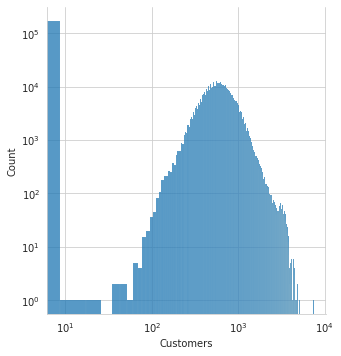

In [27]:
sns.set_style("whitegrid")
sns.displot(data=joined, x='Customers')
plt.xscale("log")
plt.yscale("log")

Then we remember that the stores are closed at times...so the real outliers for us are when the store is open and we have no customers!

In [28]:
joined[joined.Customers==0].Open.sum()

52

There are 52 of these..no customers and no sales. Perhaps not too high to make a difference. So our strategy will be to get rid of store-days

In [29]:
joined[(joined.Customers==0) & (joined.Open == True) ].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw,DayOfWeekCat,year,month,week,day,dayofyear
86825,971,5,2015-05-15,0,0,True,False,False,True,c,...,0.0,1.0,0.0,4.0,Fri,2015,5,20,15,135
142278,674,4,2015-03-26,0,0,True,False,False,False,a,...,1.0,3.0,0.0,3.0,Thu,2015,3,13,26,85
196938,699,4,2015-02-05,0,0,True,True,False,False,a,...,5.0,0.0,0.0,2.0,Thu,2015,2,6,5,36
322053,708,3,2014-10-01,0,0,True,True,False,False,c,...,3.0,0.0,1.0,5.0,Wed,2014,10,40,1,274
330176,357,1,2014-09-22,0,0,True,False,False,False,a,...,4.0,0.0,0.0,0.0,Mon,2014,9,39,22,265


We strip the dataframe of the closed days...

In [30]:
df = joined[joined.Open==True].reindex()

In [31]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw,DayOfWeekCat,year,month,week,day,dayofyear
0,1,5,2015-07-31,5263,555,True,True,False,True,c,...,5.0,7.0,0.0,5.0,Fri,2015,7,31,31,212
1,2,5,2015-07-31,6064,625,True,True,False,True,a,...,5.0,1.0,0.0,1.0,Fri,2015,7,31,31,212
2,3,5,2015-07-31,8314,821,True,True,False,True,a,...,5.0,5.0,0.0,5.0,Fri,2015,7,31,31,212
3,4,5,2015-07-31,13995,1498,True,True,False,True,c,...,5.0,1.0,0.0,1.0,Fri,2015,7,31,31,212
4,5,5,2015-07-31,4822,559,True,True,False,True,a,...,5.0,1.0,0.0,1.0,Fri,2015,7,31,31,212


In [32]:
df[stats_wanted_columns].describe()

,Sales,Customers
count,844392.000000,844392.000000
mean,6955.514291,762.728395
std,3104.214680,401.227674
min,0.000000,0.000000
25%,4859.000000,519.000000
50%,6369.000000,676.000000
75%,8360.000000,893.000000
max,41551.000000,7388.000000


The current 0s in the minimums reflect the 0 customer situations. Since there are only 52, we will keep them, not expecting such a small number in 1000+ stores over 3 years to affect matters...

Notice that this minimal EDA resulted in further refining of our dataframe for more EDA. Thus you will feel that there is a continuous process where you "Prepare for EDA and Viz" and "Do EDA and Viz" interchangeably...this is the way it should be, with EDA on the training set refining your notion of what the data should look like.

####  Univariate Distributions

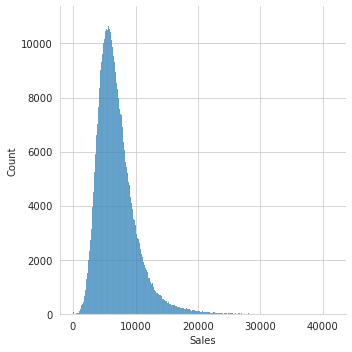

In [33]:
sns.displot(data=df, x='Sales')

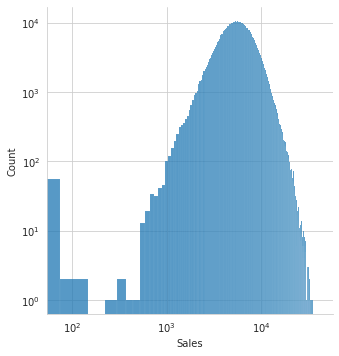

In [34]:
sns.displot(data=df, x='Sales')
plt.xscale('log')
plt.yscale('log')

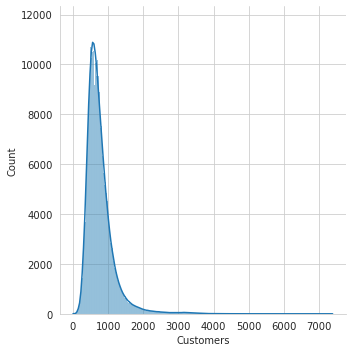

In [35]:
sns.displot(data=df, x='Customers', kde=True)

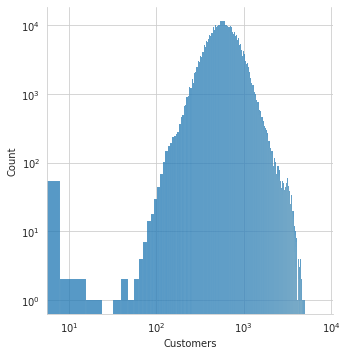

In [36]:
sns.displot(data=df, x='Customers')
plt.xscale('log')
plt.yscale('log')

There's going to be a small set at 0, and also some low sales/los customers situations. Below we see that there can be customers and no sales...

In [37]:
(df.Sales==0).sum(), (df.Customers==0).sum(), (df.Open==0).sum()

(54, 52, 0)

#### New column: sales_per_customer

A quantity of interest is how much did each customer buy?

In [38]:
sales_per_customer = (df.Sales/df.Customers)
sales_per_customer.head()

0     9.482883
1     9.702400
2    10.126675
3     9.342457
4     8.626118
dtype: float64

In [39]:
sales_per_customer.describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
dtype: float64

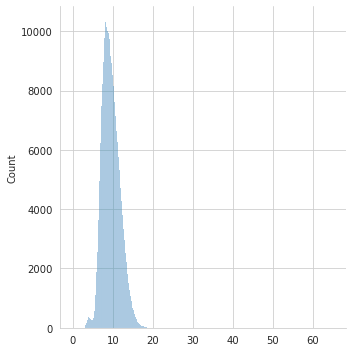

In [40]:
sns.displot(x=sales_per_customer, alpha=0.4)

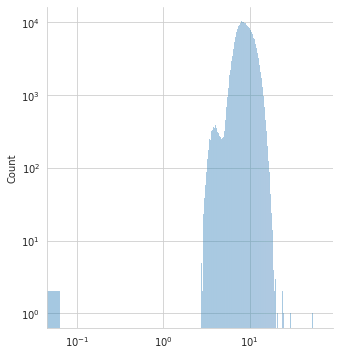

In [41]:
sns.displot(x=sales_per_customer, alpha=0.4)
plt.yscale('log')
plt.xscale('log')

Here are those two cases where there were no sales per customer

In [42]:
df[sales_per_customer==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw,DayOfWeekCat,year,month,week,day,dayofyear
478649,1100,2,2014-04-29,0,3,True,True,False,False,a,...,2.0,0.0,1.0,5.0,Tue,2014,4,18,29,119
889932,948,4,2013-04-25,0,5,True,True,False,False,b,...,4.0,0.0,1.0,5.0,Thu,2013,4,17,25,115


We can summarize the sales distribution in a somewhat different way...

<AxesSubplot:xlabel='Sales'>

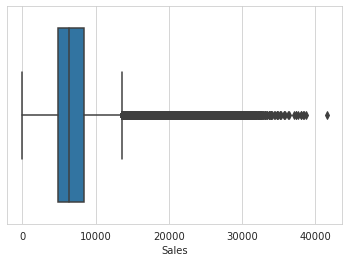

In [43]:
sns.boxplot(data=df, x='Sales')

<AxesSubplot:xlabel='Sales'>

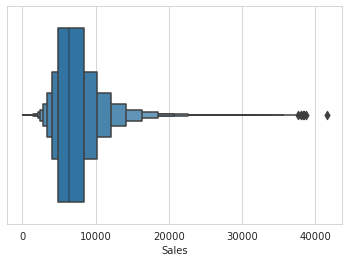

In [44]:
sns.boxenplot(data=df, x='Sales')

<AxesSubplot:xlabel='Sales'>

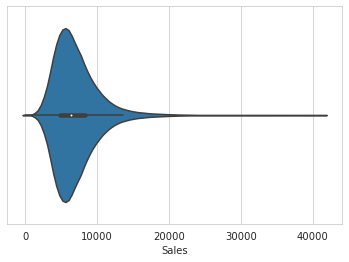

In [45]:
sns.violinplot(data=df, x='Sales')

#### Time Series Aspects

We are trying to see sales as a function of time..this may be aggregated time, as on a yearly or monthly basis, or for the entire 3 years that we have data. In a sense this is not strictly a single column plot (the `relplot` gives that away). But its close, and "globalish" so we do it:

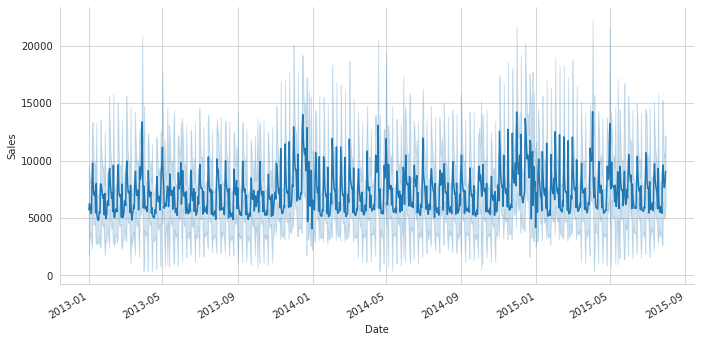

In [46]:
g = sns.relplot(data=df, x='Date', y='Sales', kind="line", ci="sd", aspect=2)
g.fig.autofmt_xdate()

The confidence interval comes from the fact that we have 1000 stores worth of data, and we are **aggregating** them. This is still global..we are combining the data from the stores rather than **faceting** by them.

We can see repeated peaks at easter and heading into the holiday season. We can do the same for customers:

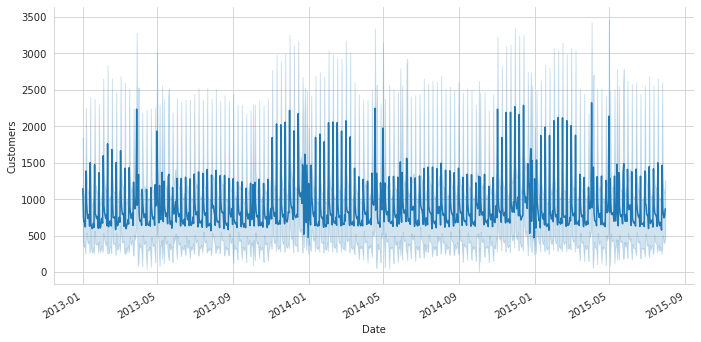

In [47]:
g = sns.relplot(data=df, x='Date', y='Customers', kind="line", ci="sd", aspect=2)
g.fig.autofmt_xdate()

At this point we think we might be able to get a better signal if we average over the years. We already created a `dayofyear` variable for that from the `Date` column.

This now looks like faceting by day of year, and IT IS. But with the temporal axis its interesting as the faceting also leads to an aggregation, since this facet is "repeated". This is a property of temporal (and spatio-temporal) datasets.

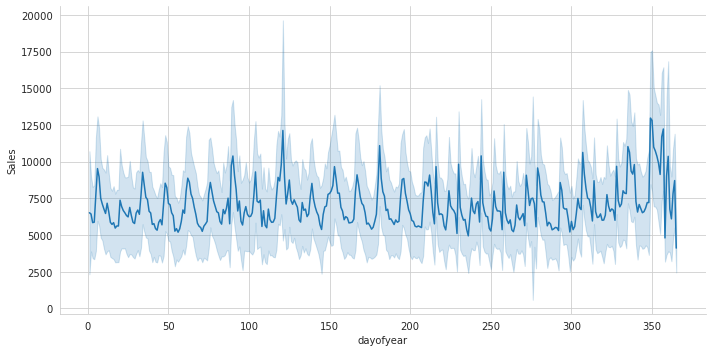

In [48]:
sns.relplot(data=df, x='dayofyear', y='Sales', kind="line", ci="sd", aspect=2)

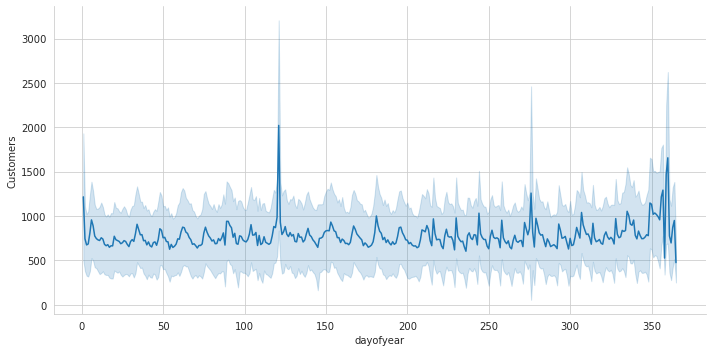

In [49]:
sns.relplot(data=df, x='dayofyear', y='Customers', kind="line", ci="sd", aspect=2);

This is a clearer signals with repeated patterns. (This is not entirely strictly true. Christmas always falls on the 25th of December but Easter falls on the first Sunday after the Full Moon date (on the ecclestial calendar), based on mathematical calculations, that falls on or after March 21.)

Maybe we should plot these "timeseries" together to see the sales and customers moving together..

<AxesSubplot:xlabel='dayofyear', ylabel='Sales'>

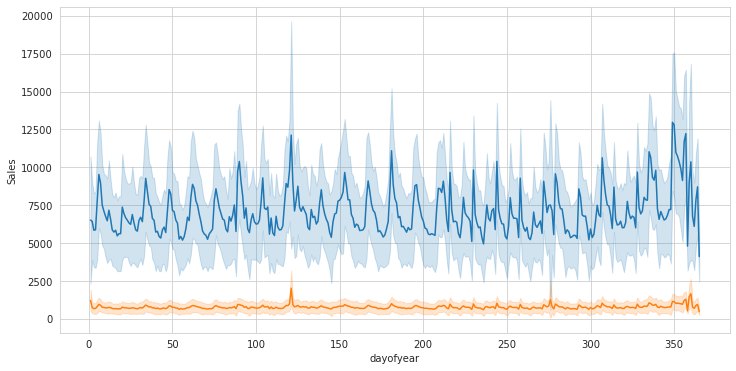

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df, x='dayofyear', y='Sales', ci="sd", ax=ax)
sns.lineplot(data=df, x='dayofyear', y='Customers',  ci="sd",  ax=ax)

Putting the plots on the same scale makes them hard to read. So instead we rely on **Parallelism** in plots, where multiple quantities are plot together when they share the same x-axis (here: day of year).

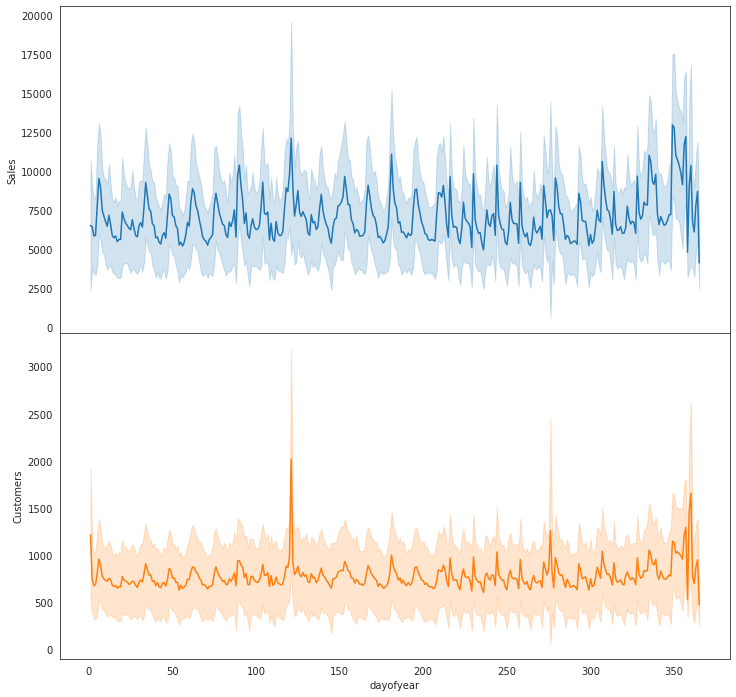

In [51]:
with sns.axes_style("white"):
    fig, axarr = plt.subplots(2,1, figsize= (12,12))
    fig.subplots_adjust(wspace=0, hspace=0)
    colors = sns.color_palette()
    sns.set_style("whitegrid")
    sns.lineplot(data=df, x='dayofyear', y='Sales', ci="sd", ax=axarr[0])
    sns.lineplot(data=df, x='dayofyear', y='Customers',  ci="sd",  ax=axarr[1], color=colors[1])

### (2) Discrete columns and global properties

They key unit in our dataframe here is store-date.

Thus we go back to the auxillary store dataframe to get just the stores info. Now we can see information on global attributes. 

In [52]:
store = pd.read_pickle('https://github.com/univai-ghf/ghfmedia/blob/main/data/VizData/store.pkl?raw=true')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,False,1,1900,NaN
1,2,a,a,570.0,11,2007,True,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,True,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,False,1,1900,NaN
4,5,a,a,29910.0,4,2015,False,1,1900,NaN


In [53]:
store_states = pd.read_csv("https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/VizData/store_states.csv")

In [54]:
store_merged = store.merge(store_states, on="Store")
store_merged['State'] = store_merged.State.astype("category")

In [55]:
store_merged.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State'],
      dtype='object')

In [56]:
store_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,c,a,1270.0,9,2008,False,1,1900,NaN,HE
1,2,a,a,570.0,11,2007,True,13,2010,"Jan,Apr,Jul,Oct",TH
2,3,a,a,14130.0,12,2006,True,14,2011,"Jan,Apr,Jul,Oct",NW
3,4,c,c,620.0,9,2009,False,1,1900,NaN,BE
4,5,a,a,29910.0,4,2015,False,1,1900,NaN,SN


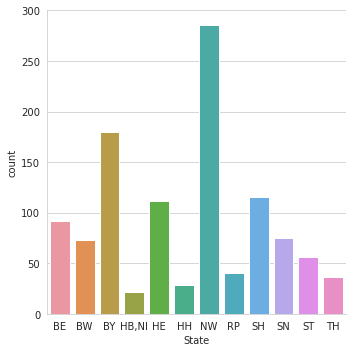

In [57]:
sns.catplot(data=store_merged, x='State',  kind='count')

NW has the largest number of stores. What about sales?..Total sales yes..

In [58]:
df.groupby('State').Sales.sum()

State
BE        604709903
BW        355745661
BY        742361827
HB,NI     131144129
HE        603605998
HH        169053366
NW       1598936483
RP        181243703
SH        618426981
SN        402442109
ST        276915114
TH        188595349
Name: Sales, dtype: int64

In [59]:
df.groupby('State').Sales.mean()

State
BE       8357.772352
BW       6255.308699
BY       6630.657893
HB,NI    7535.286658
HE       6879.563227
HH       7647.051432
NW       7171.598101
RP       5800.355330
SH       6743.729619
SN       6896.209692
ST       6357.096281
TH       6702.752568
Name: Sales, dtype: float64

But the per store-day sales are not that large there.

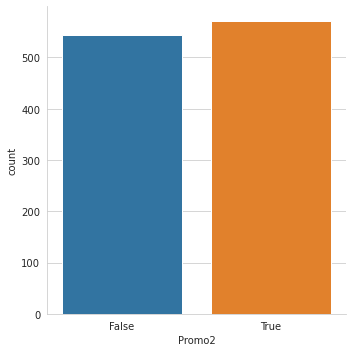

In [60]:
sns.catplot(data=store_merged, x='Promo2',  kind='count')

In general, we want to get a grip on the kinds of counts involved in our investigation.

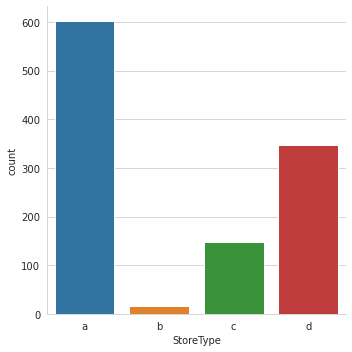

In [61]:
sns.catplot(data=store_merged, x='StoreType',  kind='count')

## The Interest in Science Problem from lecture slides

Dataframe construction:

In [62]:
science = {
    'interest': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
    'before': [19, 25, 40, 5, 11],
    'after': [38, 30, 14, 6, 12]
}
dfscience = pd.DataFrame.from_dict(science).set_index("interest")[['before', 'after']]
dfscience

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


### Multiple Pie Charts

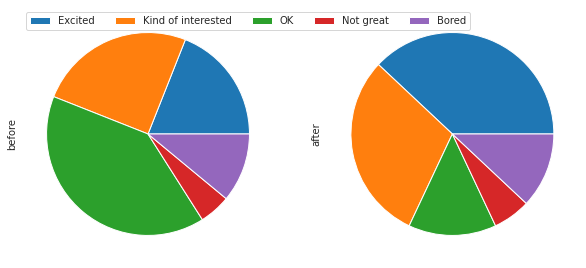

In [63]:
fig, axs = plt.subplots(1,2, figsize = (10,6))
dfscience.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=dfscience.index)
dfscience.after.plot(kind="pie", ax=axs[1], labels=None);


### Before and after bar charts

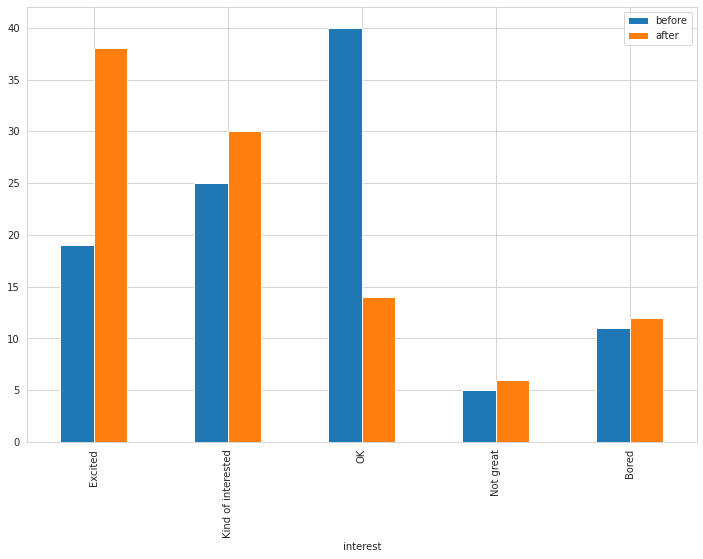

In [64]:
plt.figure(figsize=(12,8))
ax = plt.gca()
dfscience.plot(ax = ax, kind="bar");

### Stacked Charts


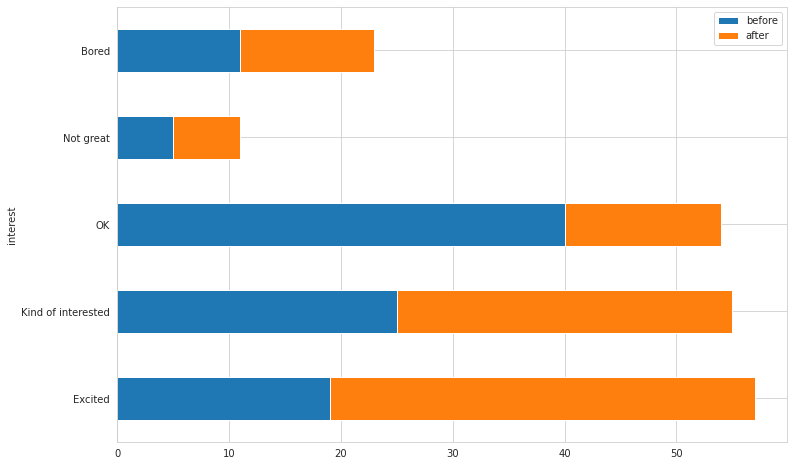

In [65]:
plt.figure(figsize=(12,8));
ax = plt.gca()
dfscience.plot(ax=ax, kind="barh", stacked=True);

This is hard to read. We want to compare before and after easily. Sometimes the solution is a transpose!!

In [66]:
dfscience.transpose()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


We have to play some games to get the ordering right...

In [67]:
dfst = dfscience.transpose()
dfst.iloc[[1, 0],:]

interest,Excited,Kind of interested,OK,Not great,Bored
after,38,30,14,6,12
before,19,25,40,5,11


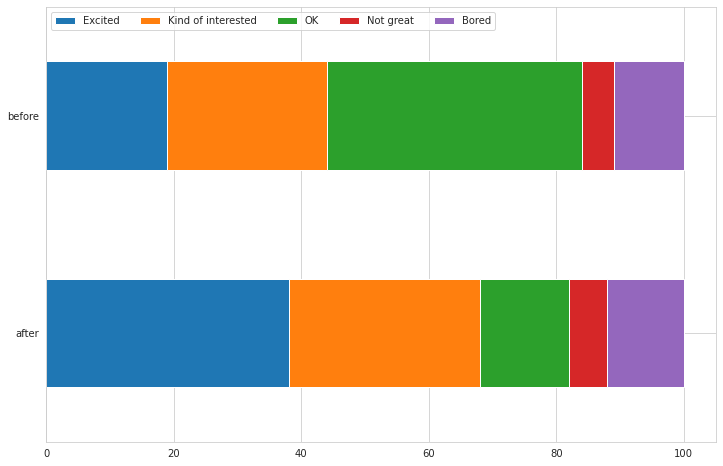

In [68]:
plt.figure(figsize=(12,8));
ax = plt.gca()
dfscience.transpose().loc[['after', 'before'], :].plot(ax=ax, kind="barh", stacked=True)
plt.legend(loc=2, ncol=5);

Now we see that the blue and greens have it. Try and improve this plot. It still has too much chartjunk.

### Difference Bar chart

Sometimes a small data transformation makes the effect blindingly obvious. Here we just make a bar chart of the change!

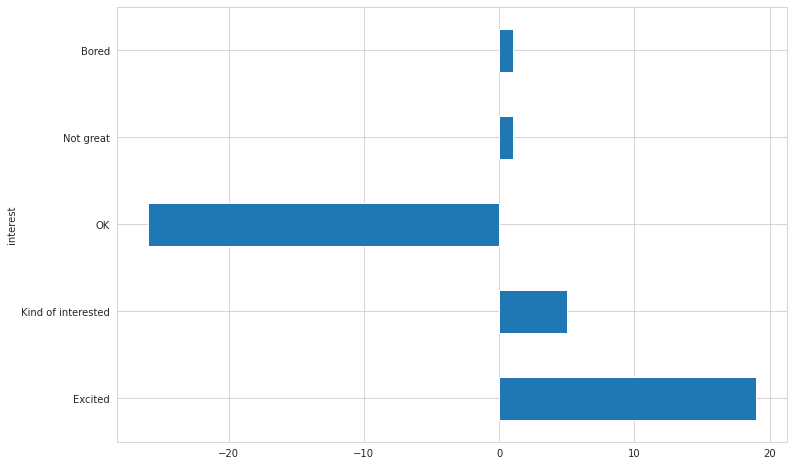

In [69]:
plt.figure(figsize=(12,8));
ax = plt.gca()
(dfscience.after - dfscience.before).plot(kind="barh", ax=ax);

### Slopegraph

In [70]:
dfst.head()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


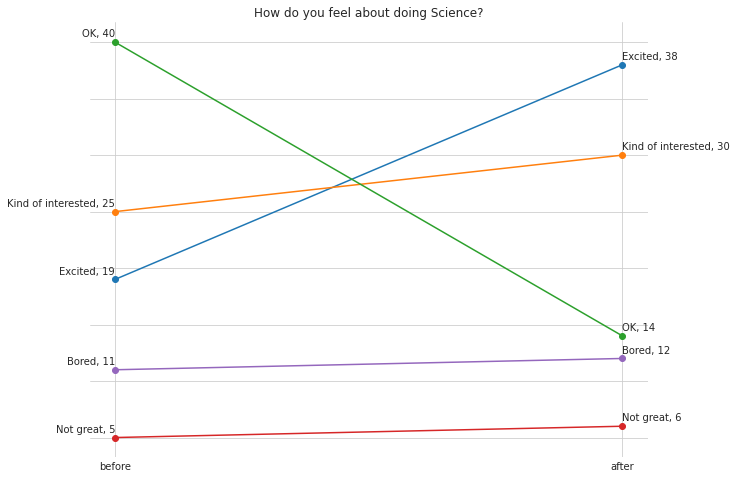

In [71]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0)
ax.set_yticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for kind in ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored']:
    vals = dfst[kind]
    plt.plot(vals, 'o-')
    plt.annotate(kind+", "+str(vals['before']), xy = ('before', vals['before']+0.5), ha='right')
    plt.annotate(kind+", "+str(vals['after']), xy = ('after', vals['after']+0.5), ha='left')

plt.title("How do you feel about doing Science?");

## Back to Rosmann: Grouped Properties

### (3) Make faceted plots for single column continuous variables

Since we dont have a discrete target, we want to look at continuous variables, and how these change with various facets. 

What are these facets? We may wish to systematically go over these,

In [72]:
gettypes = lambda y: df.dtypes[df.dtypes.apply(lambda x :str(x))==y]
gettypes("category")

DayOfWeek        category
StoreType        category
Assortment       category
PromoInterval    category
State            category
DayOfWeekCat     category
dtype: object

In [73]:
gettypes('int64')

Store                        int64
Sales                        int64
Customers                    int64
CompetitionOpenSinceMonth    int64
CompetitionOpenSinceYear     int64
Promo2SinceWeek              int64
Promo2SinceYear              int64
CompetitionDaysOpen          int64
CompetitionMonthsOpen        int64
Promo2Days                   int64
Promo2Weeks                  int64
AfterSchoolHoliday           int64
BeforeSchoolHoliday          int64
AfterStateHoliday            int64
BeforeStateHoliday           int64
AfterPromo                   int64
BeforePromo                  int64
year                         int64
month                        int64
week                         int64
day                          int64
dayofyear                    int64
dtype: object

In [74]:
df.groupby("StoreType").Sales.describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457077.0,6925.167661,3277.786381,0.0,4695.0,6285.0,8406.0,41551.0
b,15563.0,10231.407505,5157.190155,0.0,6344.0,9130.0,13183.5,38722.0
c,112978.0,6932.512755,2897.564578,0.0,4915.0,6407.0,8349.0,31448.0
d,258774.0,6822.141881,2556.582881,0.0,5050.0,6395.0,8123.0,38037.0


In [75]:
df.groupby("StoreType").Promo.describe()

,count,unique,top,freq
StoreType,,,,
a,457077,2,False,252556
b,15563,2,False,9623
c,112978,2,False,62240
d,258774,2,False,143077


Lets investigate the time related facets first.

Here we facet the previous sales plots by year...

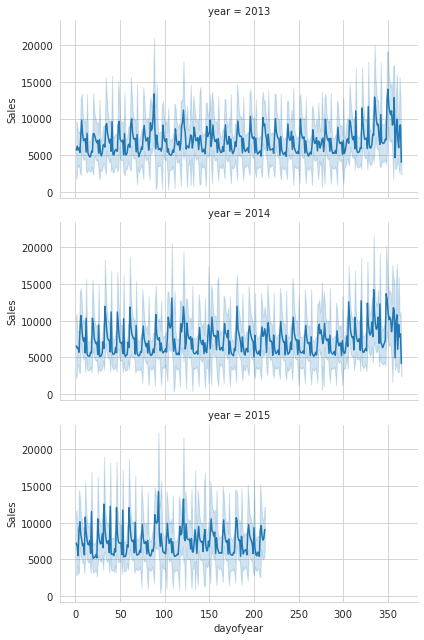

In [76]:
sns.relplot(data=df, x='dayofyear', y='Sales', kind="line", ci='sd', row='year', aspect=2, height=3);

This kind of plot is called a small multiple since you are visually trying to see trends on top of each other..your eye is trying to pick out small differences.

In the next one we are AGGREGATING by the days of a month..thus we are averaging over all months, all years. There is an interesting bump in sales around the 16th to 18th..perhaps these are people paid at a biweekly interval spending money?

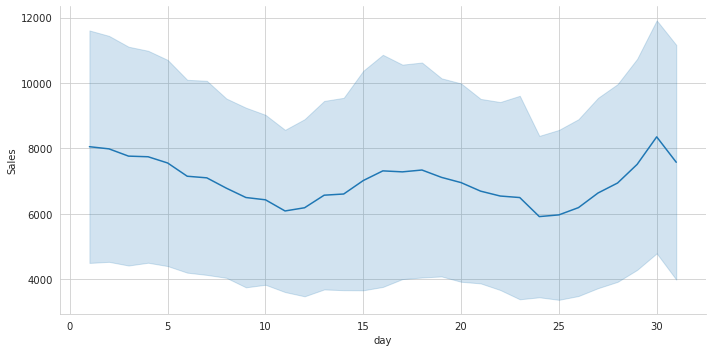

In [77]:
sns.relplot(data=df, x='day', y='Sales', kind="line", ci='sd', aspect=2);

We can treat months as a time variable and plot them

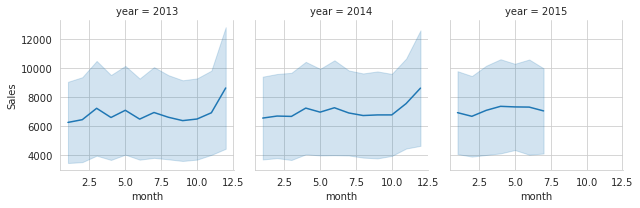

In [78]:
sns.relplot(data=df, x='month', y='Sales', kind="line", ci='sd', col='year', height=3);

You can clearly see the december bump

We can decompose month and years into a small multiples plot..the axis now is days in the month

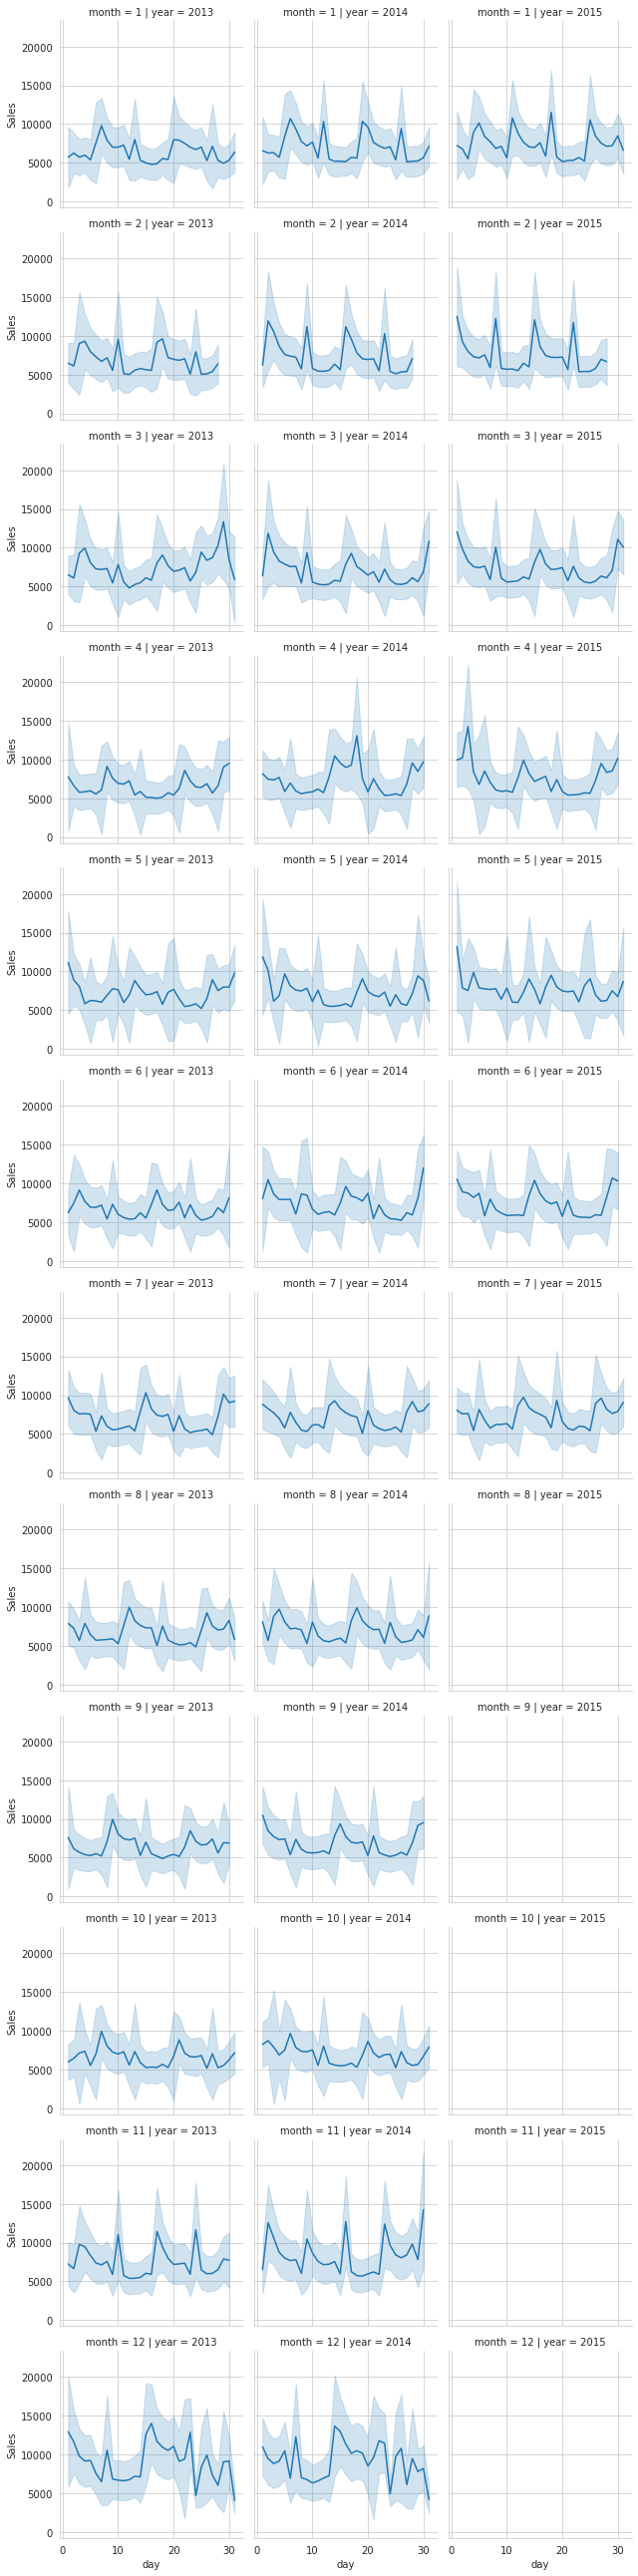

In [79]:
sns.relplot(data=df, x='day', y='Sales', kind="line", ci='sd', col='year', row='month', height=3);



How about we look at the day of the week?

A violin plot is more explicit with a kernel density estimate. There is clearly a long tail for sunday sales, and a bit of a higher trend for Mondays!

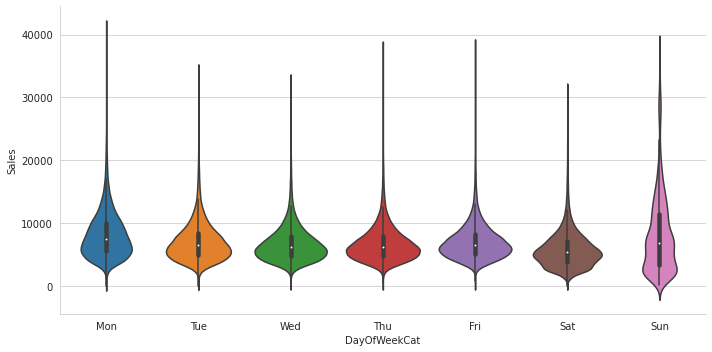

In [80]:
sns.catplot(data=df, x='DayOfWeekCat', y='Sales', kind='violin', aspect=2)

Where are these sales coming from? Are they from a particular kind of store? Small multiples again.

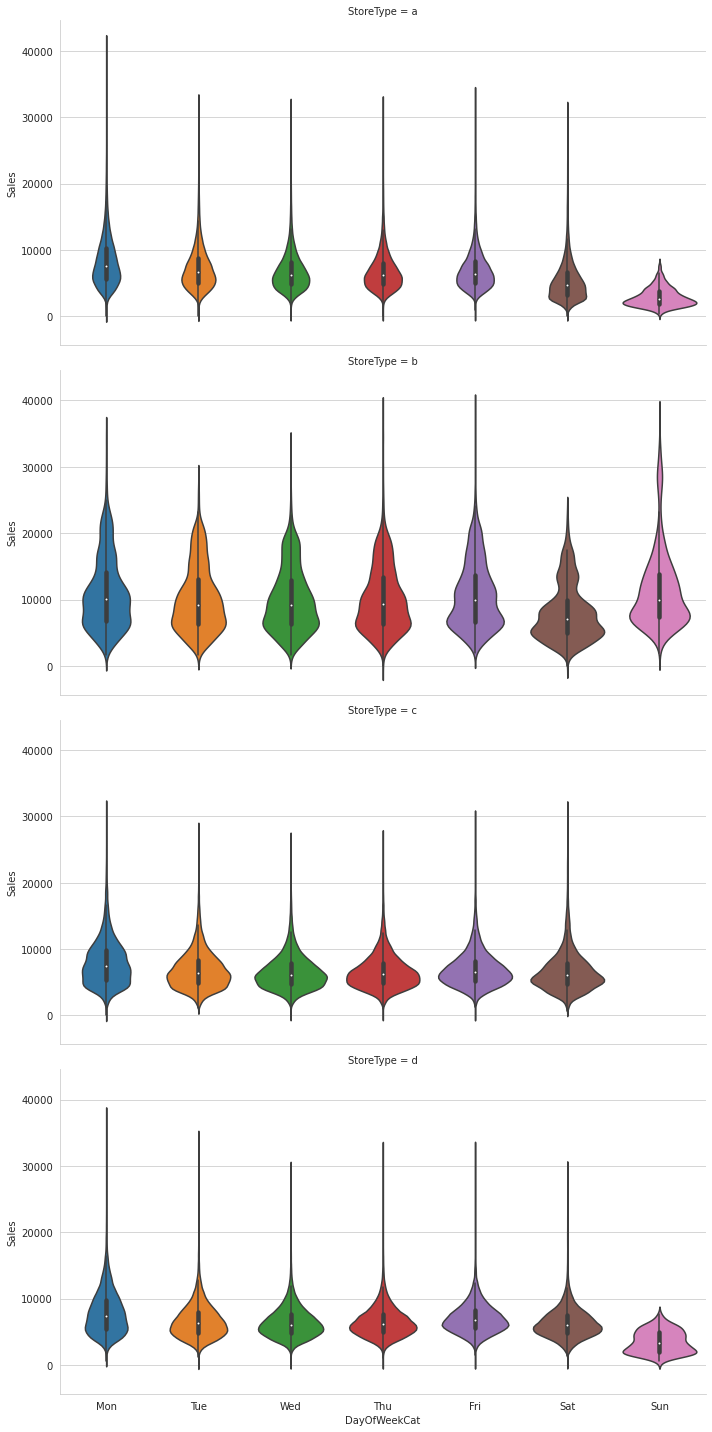

In [81]:
sns.catplot(data=df, x='DayOfWeekCat', y='Sales', row="StoreType", kind='violin', aspect=2)

Storetypes a and d are actually lower, and storetype c is not open sundays! But almost all the effect is coming from storetype b. 

#### Effect of per-day promotions

The bumps we saw earlier around 18th through 20th..were they due to biweekly earners? Or some other reason. Lets look at promos.

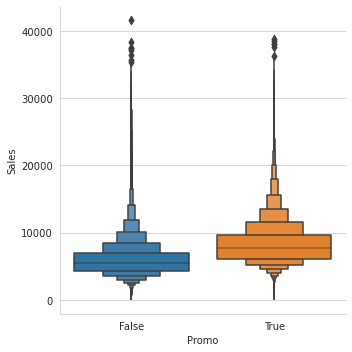

In [82]:
sns.catplot(data=df, x='Promo', y='Sales', kind='boxen')

There is definitely some effect of running a proportion. But we should plot it against time and other things:

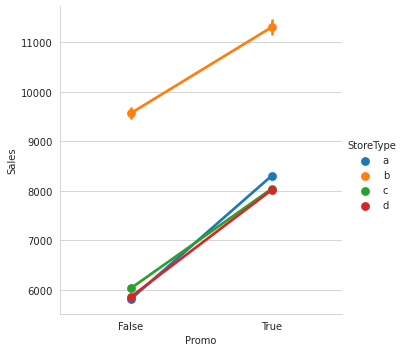

In [83]:
sns.catplot(data=df, x="Promo", y='Sales', kind="point",  hue="StoreType")

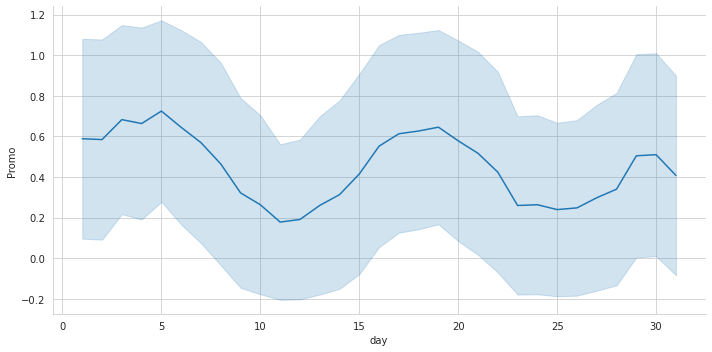

In [84]:
sns.relplot(data=df, x='day', y='Promo', kind="line", ci='sd', aspect=2);

And when you plot it against sales its quite possible that the bump may be coming from promotions...

<AxesSubplot:xlabel='day', ylabel='Promo'>

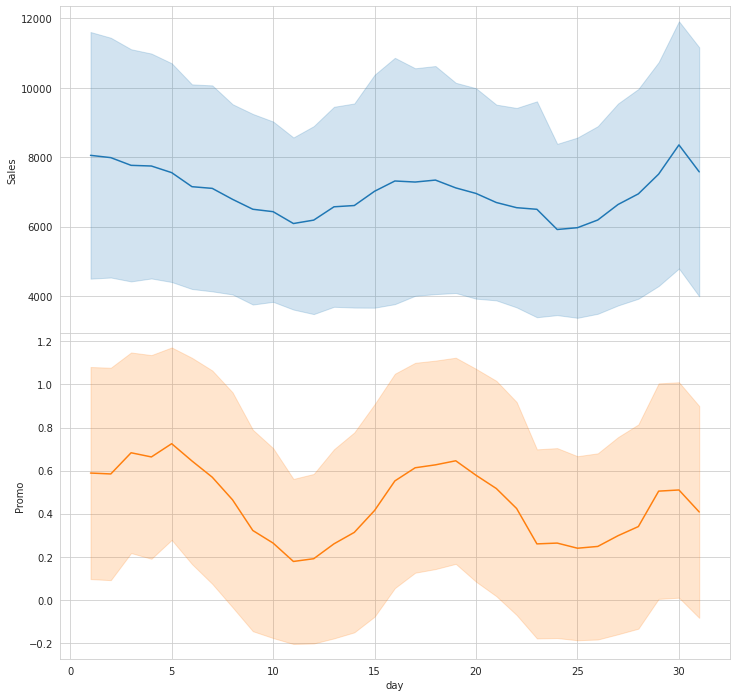

In [85]:
fig, axarr = plt.subplots(2,1, figsize= (12,12))
fig.subplots_adjust(wspace=0, hspace=0)
colors = sns.color_palette()
sns.set_style("whitegrid")
sns.lineplot(data=df, x='day', y='Sales', ci="sd", ax=axarr[0])
sns.lineplot(data=df, x='day', y='Promo',  ci="sd",  ax=axarr[1], color=colors[1])

And you can see that more customers came in, but also that the sales per customer also rose.

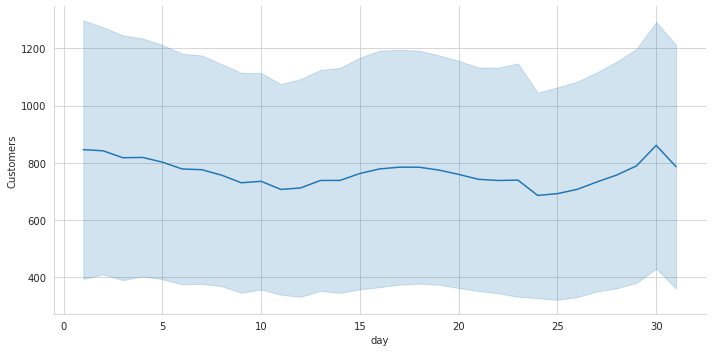

In [86]:
sns.relplot(data=df, x='day', y='Customers', kind="line", ci='sd', aspect=2);

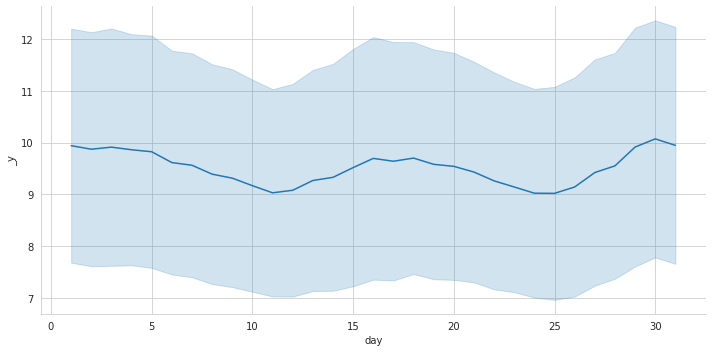

In [87]:
sns.relplot(data=df, x='day', y=sales_per_customer, kind="line", ci='sd', aspect=2);

### (4) Faceted plots for discrete variables..counts

We saw plots for the different store times, and even the small multiples separating the sales across a week into stores and assortments. Some of the plot we saw there told us that there was no data for the store-assortment combination, on any day, any year. This is a complex way to get at that data, which is after all a simple pandas crosstabulation.

In [88]:
pd.crosstab(store_merged.StoreType, store_merged.Assortment)

Assortment,a,b,c
StoreType,,,
a,381,0,221
b,7,9,1
c,77,0,71
d,128,0,220


While we'll talk about multicolumn plots and statistics later, these kind of tabulations are inherently multicolumn, so its natural to ask, for example, about how the `Assortment` and `StoreType` interact..

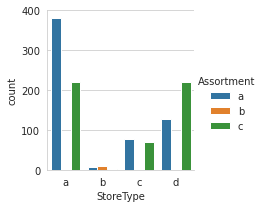

In [89]:
sns.catplot(data=store_merged, x="StoreType", hue='Assortment', kind='count', height=3)

## Explore Global and Group Properties.. Multi-Column EDA

We turn our attention to multi-column relationships. First the obvious one between Sales and Customers..

### Global Properties

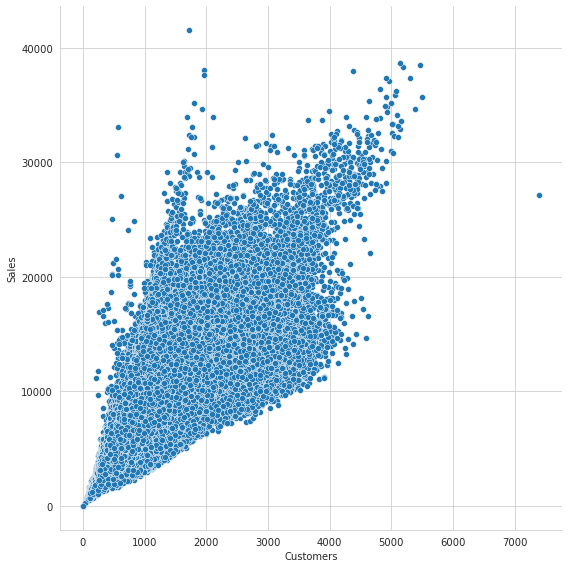

In [90]:
sns.relplot(data=df, x='Customers', y='Sales', height=8)

There is clearly a strong correlation. But, indeed it seems there is more than one regression line hiding behind that plot. We can plot this as a 2D histogram as well...

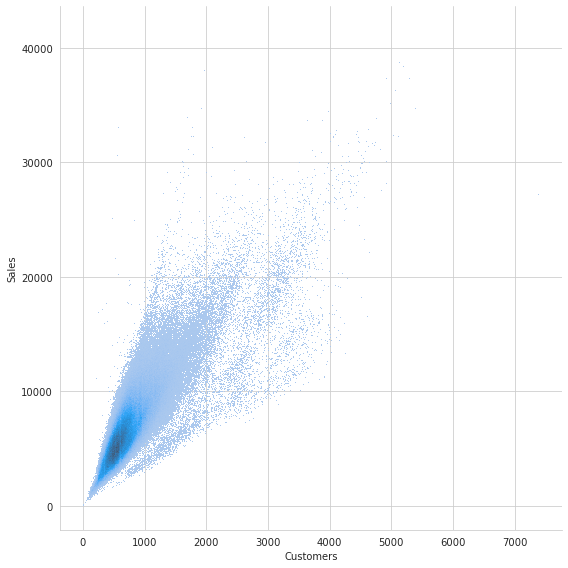

In [91]:
sns.displot(df, x='Customers', y='Sales', height = 8)

And get marginals on the side:

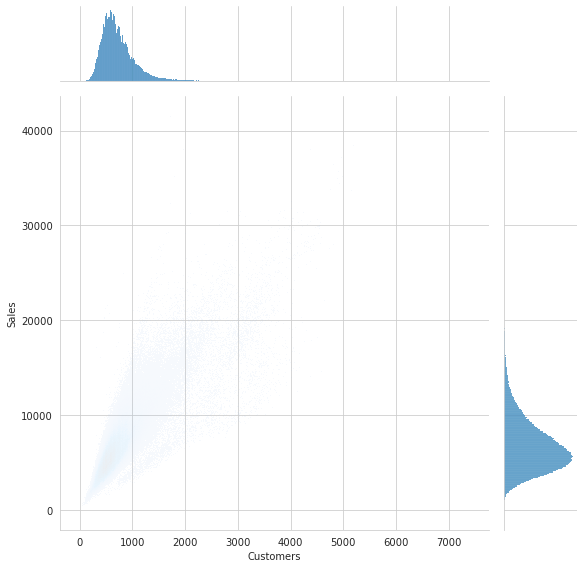

In [92]:
sns.jointplot(data=df, x='Customers', y='Sales', kind="hist", alpha=0.1, height=8)

## Group properties..distribution by facet

Lets plot the customer-sales relationship grouped by storetype.

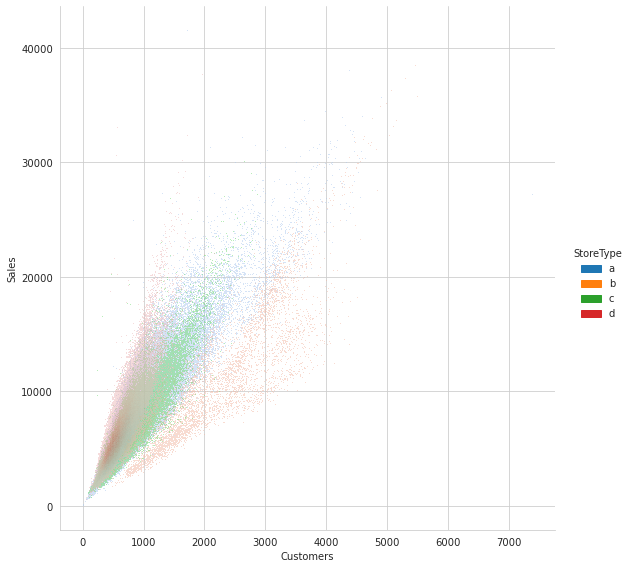

In [93]:
sns.displot(data=df, x='Customers', y='Sales', height=8, hue="StoreType", alpha=0.5)

Wow, there are definitely trends associated with the storetype! B is not very good for sales. D is the best.

Indeed the structure is very clear here. We should investigate other facets...

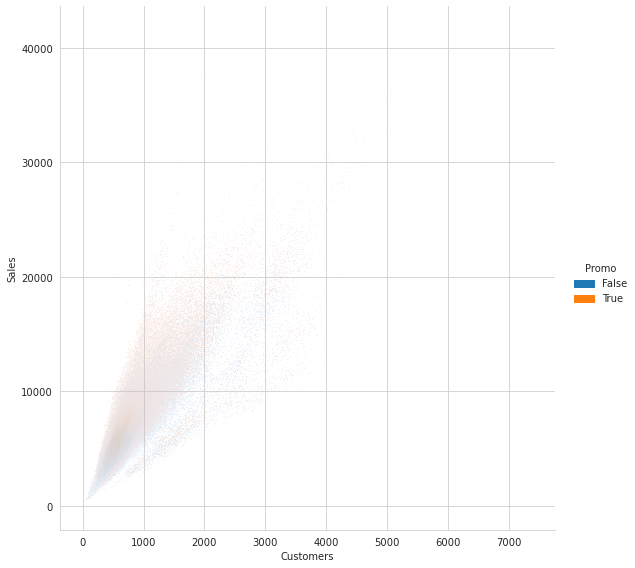

In [94]:
sns.displot(data=df, x='Customers', y='Sales', height=8, hue="Promo", alpha=0.2)

The running of a promo seems to have a bit of an effect, as we saw earlier

### Mixing Categorical/Discrete and Continuous distributions



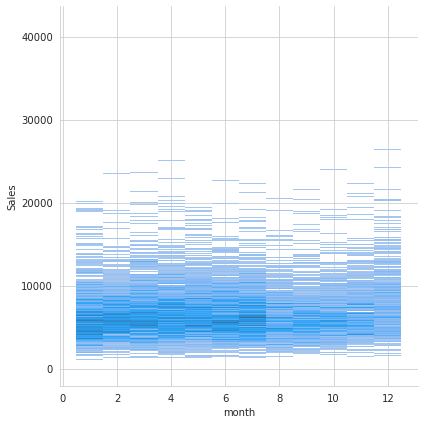

In [95]:
sns.displot(data=df, x='month', y='Sales', discrete=True, height=6)

December definitely has more sales, large enough to vanish the 5000-6000 DM daily average we see otherwise.

This idea of plotting a categorical or integer against a float is very useful for seeing large categorical levels.

(0.0, 10000.0)

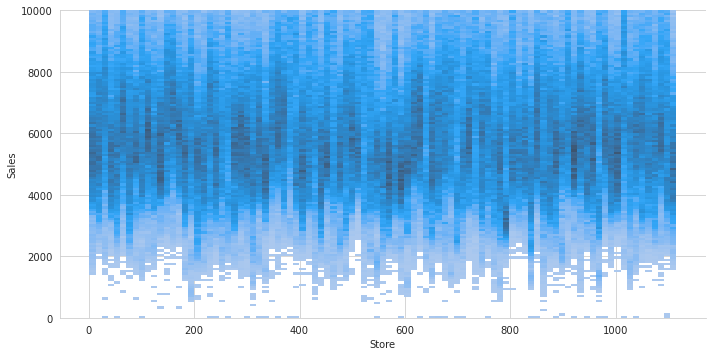

In [96]:
sns.displot(data=df, x='Store', y='Sales', aspect=2)
plt.ylim(0,10000)

### Discrete-Discrete distributions or heatmaps.

These are not distributions of sales but are useful for second-order sleuthing..we know there are some states where conversion is higher..what else correlates with this?

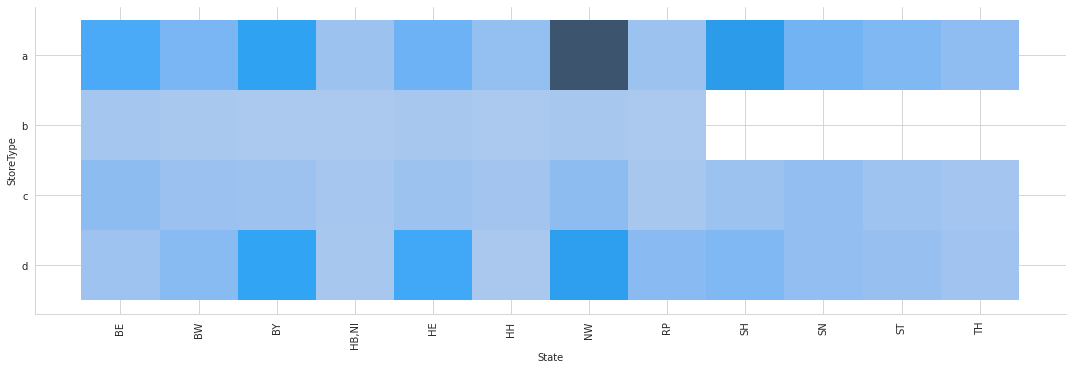

In [97]:
sns.displot(data=df, x="State", y="StoreType", aspect=3)
plt.xticks(rotation="vertical");

The states where conversion is high, also have more D and A type stores on the whole.

This plot could have also been made using `sns.heatmap`

<AxesSubplot:xlabel='State', ylabel='StoreType'>

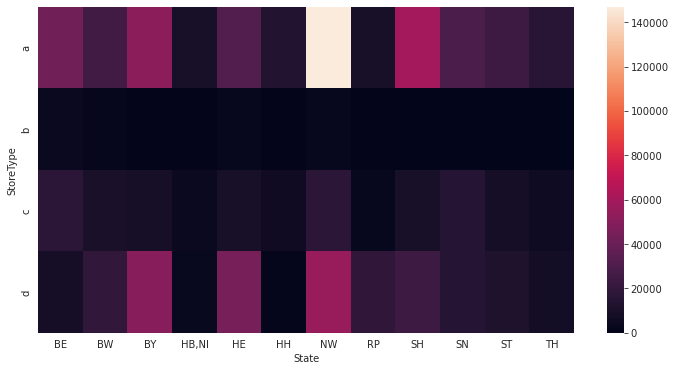

In [98]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df['State'], joined['StoreType']).T)

### ScatterPlot Matrix (SPLOM)

Scatterplot matrices (SPLOMs) are one stop shops for correlations. These have great information densities.

In [99]:
df.dtypes

Store                                 int64
DayOfWeek                          category
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                   bool
Promo                                  bool
StateHoliday                           bool
SchoolHoliday                          bool
StoreType                          category
Assortment                         category
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                 bool
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                      category
State                              category
CompetitionOpenSince         datetime64[ns]
CompetitionDaysOpen                   int64
CompetitionMonthsOpen                 int64
Promo2Since                  dat

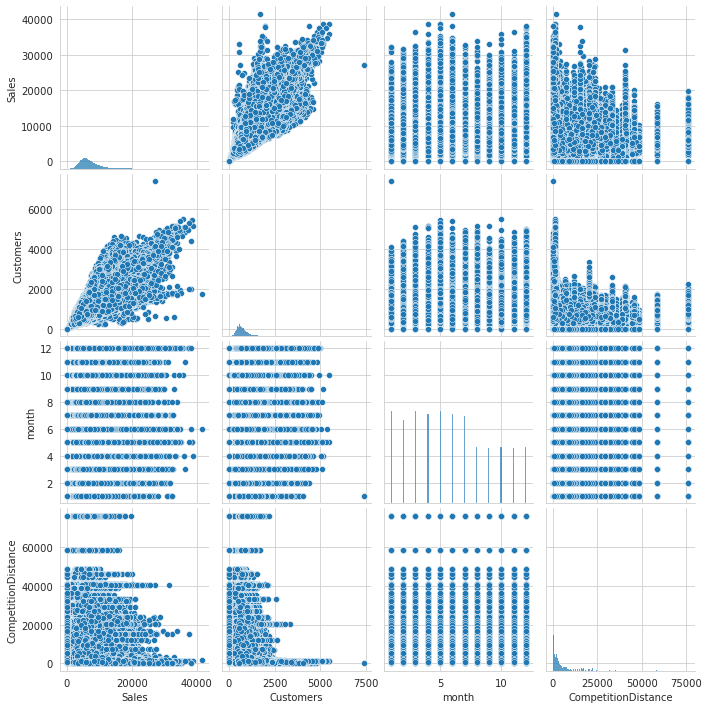

In [100]:
sns.pairplot(data=joined[['Sales', 'Customers', 'month', 'CompetitionDistance']])